In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
from reservoirpy.observables import rmse
import scipy.stats as stats

C:\Users\Peter\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
print(pd.__version__)

2.2.1


In [3]:

begin = 0
end = 221966

In [4]:
pd.read_pickle("c:/EEG_VICON/DF_EEG_Motion_withMOUV_SubjectPatrice.pkl").columns

Index(['TIME', 'C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FPZ',
       'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6', 'HX',
       'HY', 'HZ', 'RX', 'RY', 'RZ', 'BLOCK', 'HV', 'RV', 'DISTANCE', 'LAG',
       'MOUV', 'Motif', 'VHD'],
      dtype='object')

In [5]:
import os
from sklearn.preprocessing import StandardScaler
import pandas as pd
direct = "C:/EEG_VICON_special"
files = [os.path.join(direct,file) for file in os.listdir(direct) if file.endswith(".pkl")]
df = pd.concat([pd.read_pickle(file) for file in files]).dropna(subset='HX')

"""df = pd.read_pickle(files[10]).dropna(subset='HX')
print(files[10])"""


"df = pd.read_pickle(files[10]).dropna(subset='HX')\nprint(files[10])"

In [6]:
files

['C:/EEG_VICON_special\\DF_EEG_Motion_withMOUV_SubjectAntoine.pkl',
 'C:/EEG_VICON_special\\DF_EEG_Motion_withMOUV_SubjectLouise.pkl',
 'C:/EEG_VICON_special\\DF_EEG_Motion_withMOUV_SubjectMael.pkl',
 'C:/EEG_VICON_special\\DF_EEG_Motion_withMOUV_SubjectPatrice.pkl',
 'C:/EEG_VICON_special\\DF_EEG_Motion_withMOUV_SubjectPauline.pkl',
 'C:/EEG_VICON_special\\DF_EEG_Motion_withMOUV_SubjectPierre.pkl',
 'C:/EEG_VICON_special\\DF_EEG_Motion_withMOUV_SubjectSophie.pkl',
 'C:/EEG_VICON_special\\DF_EEG_Motion_withMOUV_SubjectYuyang.pkl']

In [7]:
df.columns

Index(['TIME', 'C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FPZ',
       'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6', 'HX',
       'HY', 'HZ', 'RX', 'RY', 'RZ', 'BLOCK', 'HV', 'RV', 'DISTANCE', 'LAG',
       'MOUV', 'Motif', 'VHD', 'AF7', 'AF3', 'F1', 'F5', 'FT7', 'FC5', 'FC3',
       'FC1', 'C1', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P5', 'P7',
       'P9', 'PO7', 'PO3', 'IZ', 'POZ', 'CPZ', 'AF8', 'AF4', 'AFZ', 'F2', 'F6',
       'FT8', 'FC6', 'FC4', 'FC2', 'FCZ', 'C2', 'C6', 'T8', 'TP8', 'CP6',
       'CP4', 'CP2', 'P2', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'STATUS'],
      dtype='object')

In [8]:
#df = df.query('BLOCK == 9' ) #before this 1355557 rows × 36 columns

In [9]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
#columns_of_interest = ['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FPZ',
#                       'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ','RX','RZ','HX','HV','RV']
columns_of_interest = ['C3', 'C4', 'CZ', 'F3', 'F4', 'FZ', 'P3', 'P4', 'PZ','RX','RZ','HX','HV','RV']
sc = scaler.fit_transform(df[columns_of_interest])
df = pd.DataFrame(sc, columns=columns_of_interest)

"""block_size = 100
blocks = [df.iloc[i:i + block_size] for i in range(0, len(df), block_size)]

# Utiliser train_test_split sur les blocs
train_blocks, test_blocks = train_test_split(blocks, test_size=0.2, random_state=42)

# Combiner les blocs en ensembles d'entraînement et de test
train_df = pd.concat(train_blocks)
test_df = pd.concat(test_blocks)"""

train_df = df.iloc[0:int(len(df)*0.8)]
test_df = df.iloc[int(len(df)*0.8):]


def create_input_output(df):
    #columns_of_interest = ['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FPZ',
    #                  'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ']
    columns_of_interest = ['C3', 'C4', 'CZ', 'F3', 'F4', 'FZ', 'P3', 'P4', 'PZ']
    dfeeg = df[columns_of_interest]
    

    # Convert to a NumPy array
    input_1 = dfeeg.to_numpy()

    # Verify the shape of the resulting array
    print(input_1.shape)  # Should print (n, 21) where n is the number of rows

    columns_of_interest = ['RV','HV']
    #columns_of_interest = ['RX','RZ']
    dfvicon = df[columns_of_interest]
    

    # Convert to a NumPy array
    output_1 = dfvicon.to_numpy()

    # Verify the shape of the resulting array
    print(output_1.shape)  # Should print (n, 21) where n is the number of rows
    return input_1,output_1

input_1,output_1 = create_input_output(train_df)
input_2,output_2 = create_input_output(test_df)

(962471, 9)
(962471, 2)
(240618, 9)
(240618, 2)


In [10]:
input_1.shape
input_1 = gaussian_filter1d(input_1, sigma=20, axis=0)
input_2 = gaussian_filter1d(input_2, sigma=20, axis=0)

In [11]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(units=1000,sr=0.9,lr=0.01)
readout = Ridge(ridge=1e-6)

model = reservoir >> readout

U_train = input_1
Y_train = output_1

U_test = input_2
Y_test = output_2

model.fit(U_train, Y_train)

Y_pred = model.run(U_test)


Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 499it [00:00, 4946.09it/s]                                                                            
Running Model-0: 994it [00:00, 4870.62it/s]
Running Model-0: 1482it [00:00, 4836.39it/s]
Running Model-0: 1966it [00:00, 4820.71it/s]
Running Model-0: 2455it [00:00, 4836.93it/s]
Running Model-0: 2939it [00:00, 4808.00it/s]
Running Model-0: 3420it [00:00, 4796.14it/s]
Running Model-0: 3900it [00:00, 4755.23it/s]
Running Model-0: 4400it [00:00, 4821.62it/s]
Running Model-0: 4892it [00:01, 4845.01it/s]
Running Model-0: 5389it [00:01, 4870.10it/s]
Running Model-0: 5877it [00:01, 4847.42it/s]
Running Model-0: 6368it [00:01, 4854.52it/s]
Running Model-0: 6854it [00:01, 4832.81it/s]
Running Model-0: 7342it [00:01, 4835.59it/s]
Running Model-0: 7826it [00:01, 4825.60it/s]
Running Model-0: 8309it [00:01, 4815.55it/s]
Running Model-0: 8810it [00:01, 4862.15it

Running Model-0: 79332it [00:16, 4854.90it/s]
Running Model-0: 79831it [00:16, 4877.60it/s]
Running Model-0: 80323it [00:16, 4889.96it/s]
Running Model-0: 80813it [00:16, 4892.18it/s]
Running Model-0: 81303it [00:16, 4857.91it/s]
Running Model-0: 81789it [00:16, 4820.02it/s]
Running Model-0: 82284it [00:17, 4848.57it/s]
Running Model-0: 82769it [00:17, 4837.42it/s]
Running Model-0: 83255it [00:17, 4833.08it/s]
Running Model-0: 83739it [00:17, 4825.36it/s]
Running Model-0: 84222it [00:17, 4780.01it/s]
Running Model-0: 84715it [00:17, 4814.79it/s]
Running Model-0: 85197it [00:17, 4776.71it/s]
Running Model-0: 85675it [00:17, 4753.43it/s]
Running Model-0: 86158it [00:17, 4764.12it/s]
Running Model-0: 86635it [00:17, 4754.94it/s]
Running Model-0: 87127it [00:18, 4795.39it/s]
Running Model-0: 87626it [00:18, 4842.18it/s]
Running Model-0: 88111it [00:18, 4833.36it/s]
Running Model-0: 88595it [00:18, 4753.14it/s]
Running Model-0: 89085it [00:18, 4791.88it/s]
Running Model-0: 89565it [00:18, 4

Running Model-0: 159590it [00:33, 4775.98it/s]
Running Model-0: 160076it [00:33, 4791.46it/s]
Running Model-0: 160565it [00:33, 4810.83it/s]
Running Model-0: 161047it [00:33, 4789.05it/s]
Running Model-0: 161530it [00:33, 4790.22it/s]
Running Model-0: 162028it [00:33, 4835.29it/s]
Running Model-0: 162527it [00:33, 4867.44it/s]
Running Model-0: 163032it [00:33, 4909.40it/s]
Running Model-0: 163523it [00:33, 4869.05it/s]
Running Model-0: 164015it [00:33, 4874.14it/s]
Running Model-0: 164516it [00:34, 4905.19it/s]
Running Model-0: 165019it [00:34, 4931.05it/s]
Running Model-0: 165520it [00:34, 4946.80it/s]
Running Model-0: 166015it [00:34, 4936.08it/s]
Running Model-0: 166512it [00:34, 4941.98it/s]
Running Model-0: 167007it [00:34, 4933.58it/s]
Running Model-0: 167501it [00:34, 4868.51it/s]
Running Model-0: 167992it [00:34, 4874.54it/s]
Running Model-0: 168480it [00:34, 4859.76it/s]
Running Model-0: 168988it [00:34, 4915.21it/s]
Running Model-0: 169481it [00:35, 4910.07it/s]
Running Model

Running Model-0: 239659it [00:49, 4894.75it/s]
Running Model-0: 240149it [00:49, 4874.33it/s]
Running Model-0: 240637it [00:49, 4862.94it/s]
Running Model-0: 241124it [00:49, 4854.02it/s]
Running Model-0: 241610it [00:49, 4844.68it/s]
Running Model-0: 242095it [00:50, 4781.41it/s]
Running Model-0: 242574it [00:50, 4744.10it/s]
Running Model-0: 243049it [00:50, 4734.91it/s]
Running Model-0: 243541it [00:50, 4778.38it/s]
Running Model-0: 244038it [00:50, 4823.51it/s]
Running Model-0: 244525it [00:50, 4826.43it/s]
Running Model-0: 245018it [00:50, 4847.02it/s]
Running Model-0: 245503it [00:50, 4835.59it/s]
Running Model-0: 245994it [00:50, 4846.97it/s]
Running Model-0: 246482it [00:50, 4844.03it/s]
Running Model-0: 246970it [00:51, 4843.94it/s]
Running Model-0: 247467it [00:51, 4875.23it/s]
Running Model-0: 247955it [00:51, 4840.37it/s]
Running Model-0: 248461it [00:51, 4893.76it/s]
Running Model-0: 248962it [00:51, 4922.52it/s]
Running Model-0: 249455it [00:51, 4869.43it/s]
Running Model

Running Model-0: 319570it [01:06, 4791.51it/s]
Running Model-0: 320050it [01:06, 4605.10it/s]
Running Model-0: 320512it [01:06, 4590.40it/s]
Running Model-0: 321006it [01:06, 4681.21it/s]
Running Model-0: 321494it [01:06, 4727.53it/s]
Running Model-0: 321968it [01:06, 4719.86it/s]
Running Model-0: 322446it [01:06, 4726.68it/s]
Running Model-0: 322934it [01:06, 4761.90it/s]
Running Model-0: 323421it [01:06, 4782.87it/s]
Running Model-0: 323907it [01:06, 4799.56it/s]
Running Model-0: 324388it [01:07, 4768.98it/s]
Running Model-0: 324866it [01:07, 4474.12it/s]
Running Model-0: 325318it [01:07, 3995.92it/s]
Running Model-0: 325790it [01:07, 4179.95it/s]
Running Model-0: 326271it [01:07, 4343.16it/s]
Running Model-0: 326752it [01:07, 4465.55it/s]
Running Model-0: 327206it [01:07, 4482.14it/s]
Running Model-0: 327703it [01:07, 4614.57it/s]
Running Model-0: 328181it [01:07, 4652.34it/s]
Running Model-0: 328657it [01:08, 4683.07it/s]
Running Model-0: 329136it [01:08, 4705.17it/s]
Running Model

Running Model-0: 398710it [01:22, 4837.23it/s]
Running Model-0: 399206it [01:22, 4870.66it/s]
Running Model-0: 399694it [01:22, 4805.06it/s]
Running Model-0: 400177it [01:22, 4801.36it/s]
Running Model-0: 400658it [01:23, 4728.91it/s]
Running Model-0: 401170it [01:23, 4831.39it/s]
Running Model-0: 401669it [01:23, 4868.00it/s]
Running Model-0: 402165it [01:23, 4884.19it/s]
Running Model-0: 402654it [01:23, 4874.02it/s]
Running Model-0: 403144it [01:23, 4872.26it/s]
Running Model-0: 403644it [01:23, 4897.18it/s]
Running Model-0: 404134it [01:23, 4873.23it/s]
Running Model-0: 404626it [01:23, 4876.06it/s]
Running Model-0: 405121it [01:23, 4887.60it/s]
Running Model-0: 405610it [01:24, 4862.64it/s]
Running Model-0: 406105it [01:24, 4877.23it/s]
Running Model-0: 406597it [01:24, 4877.76it/s]
Running Model-0: 407096it [01:24, 4901.09it/s]
Running Model-0: 407587it [01:24, 4899.64it/s]
Running Model-0: 408077it [01:24, 4873.46it/s]
Running Model-0: 408565it [01:24, 4849.73it/s]
Running Model

Running Model-0: 478206it [01:39, 4829.09it/s]
Running Model-0: 478711it [01:39, 4881.43it/s]
Running Model-0: 479203it [01:39, 4886.85it/s]
Running Model-0: 479714it [01:39, 4939.43it/s]
Running Model-0: 480208it [01:39, 4928.53it/s]
Running Model-0: 480701it [01:39, 4888.09it/s]
Running Model-0: 481190it [01:39, 4877.50it/s]
Running Model-0: 481678it [01:39, 4852.59it/s]
Running Model-0: 482164it [01:39, 4829.15it/s]
Running Model-0: 482647it [01:40, 4817.62it/s]
Running Model-0: 483129it [01:40, 4806.82it/s]
Running Model-0: 483617it [01:40, 4816.43it/s]
Running Model-0: 484108it [01:40, 4837.01it/s]
Running Model-0: 484592it [01:40, 4779.69it/s]
Running Model-0: 485071it [01:40, 4747.41it/s]
Running Model-0: 485546it [01:40, 4712.94it/s]
Running Model-0: 486018it [01:40, 4694.08it/s]
Running Model-0: 486518it [01:40, 4780.58it/s]
Running Model-0: 487008it [01:40, 4809.98it/s]
Running Model-0: 487514it [01:41, 4871.37it/s]
Running Model-0: 488005it [01:41, 4872.47it/s]
Running Model

Running Model-0: 557824it [01:55, 4805.36it/s]
Running Model-0: 558305it [01:55, 4747.34it/s]
Running Model-0: 558780it [01:55, 4698.11it/s]
Running Model-0: 559251it [01:55, 4652.07it/s]
Running Model-0: 559738it [01:56, 4709.19it/s]
Running Model-0: 560216it [01:56, 4721.63it/s]
Running Model-0: 560696it [01:56, 4740.30it/s]
Running Model-0: 561171it [01:56, 4737.13it/s]
Running Model-0: 561645it [01:56, 4702.81it/s]
Running Model-0: 562116it [01:56, 4701.46it/s]
Running Model-0: 562600it [01:56, 4732.94it/s]
Running Model-0: 563091it [01:56, 4782.88it/s]
Running Model-0: 563577it [01:56, 4798.53it/s]
Running Model-0: 564057it [01:57, 4755.84it/s]
Running Model-0: 564533it [01:57, 4733.98it/s]
Running Model-0: 565007it [01:57, 4676.17it/s]
Running Model-0: 565475it [01:57, 4667.47it/s]
Running Model-0: 565942it [01:57, 4659.17it/s]
Running Model-0: 566409it [01:57, 4653.91it/s]
Running Model-0: 566904it [01:57, 4729.67it/s]
Running Model-0: 567395it [01:57, 4771.60it/s]
Running Model

Running Model-0: 636573it [02:12, 4797.58it/s]
Running Model-0: 637065it [02:12, 4822.47it/s]
Running Model-0: 637554it [02:12, 4831.14it/s]
Running Model-0: 638047it [02:12, 4849.48it/s]
Running Model-0: 638537it [02:12, 4852.55it/s]
Running Model-0: 639023it [02:12, 4805.07it/s]
Running Model-0: 639504it [02:12, 4798.94it/s]
Running Model-0: 639984it [02:12, 4749.76it/s]
Running Model-0: 640460it [02:13, 4730.42it/s]
Running Model-0: 640934it [02:13, 4729.82it/s]
Running Model-0: 641408it [02:13, 4728.87it/s]
Running Model-0: 641886it [02:13, 4736.55it/s]
Running Model-0: 642360it [02:13, 4714.42it/s]
Running Model-0: 642832it [02:13, 4692.26it/s]
Running Model-0: 643318it [02:13, 4732.39it/s]
Running Model-0: 643800it [02:13, 4752.90it/s]
Running Model-0: 644276it [02:13, 4704.97it/s]
Running Model-0: 644747it [02:13, 4682.93it/s]
Running Model-0: 645216it [02:14, 4665.20it/s]
Running Model-0: 645690it [02:14, 4680.27it/s]
Running Model-0: 646163it [02:14, 4687.29it/s]
Running Model

Running Model-0: 715231it [02:28, 4723.31it/s]
Running Model-0: 715723it [02:28, 4774.22it/s]
Running Model-0: 716201it [02:28, 4754.39it/s]
Running Model-0: 716689it [02:29, 4783.50it/s]
Running Model-0: 717168it [02:29, 4722.05it/s]
Running Model-0: 717661it [02:29, 4772.32it/s]
Running Model-0: 718153it [02:29, 4813.68it/s]
Running Model-0: 718640it [02:29, 4824.93it/s]
Running Model-0: 719143it [02:29, 4875.83it/s]
Running Model-0: 719642it [02:29, 4897.33it/s]
Running Model-0: 720132it [02:29, 4886.31it/s]
Running Model-0: 720621it [02:29, 4847.45it/s]
Running Model-0: 721107it [02:29, 4839.92it/s]
Running Model-0: 721593it [02:30, 4834.56it/s]
Running Model-0: 722078it [02:30, 4827.34it/s]
Running Model-0: 722561it [02:30, 4802.60it/s]
Running Model-0: 723056it [02:30, 4834.62it/s]
Running Model-0: 723545it [02:30, 4839.63it/s]
Running Model-0: 724039it [02:30, 4857.27it/s]
Running Model-0: 724528it [02:30, 4855.02it/s]
Running Model-0: 725014it [02:30, 4788.14it/s]
Running Model

Running Model-0: 794515it [02:45, 4841.89it/s]
Running Model-0: 795011it [02:45, 4866.27it/s]
Running Model-0: 795498it [02:45, 4844.53it/s]
Running Model-0: 795983it [02:45, 4835.63it/s]
Running Model-0: 796467it [02:45, 4825.32it/s]
Running Model-0: 796950it [02:45, 4780.38it/s]
Running Model-0: 797429it [02:45, 4716.78it/s]
Running Model-0: 797901it [02:45, 4680.51it/s]
Running Model-0: 798371it [02:46, 4672.84it/s]
Running Model-0: 798858it [02:46, 4714.13it/s]
Running Model-0: 799330it [02:46, 4704.54it/s]
Running Model-0: 799801it [02:46, 4680.15it/s]
Running Model-0: 800285it [02:46, 4721.62it/s]
Running Model-0: 800779it [02:46, 4778.26it/s]
Running Model-0: 801266it [02:46, 4793.30it/s]
Running Model-0: 801746it [02:46, 4770.17it/s]
Running Model-0: 802237it [02:46, 4800.26it/s]
Running Model-0: 802736it [02:47, 4845.07it/s]
Running Model-0: 803221it [02:47, 4817.44it/s]
Running Model-0: 803704it [02:47, 4810.36it/s]
Running Model-0: 804202it [02:47, 4849.62it/s]
Running Model

Running Model-0: 868590it [03:02, 4712.61it/s]
Running Model-0: 869064it [03:02, 4709.77it/s]
Running Model-0: 869550it [03:02, 4743.62it/s]
Running Model-0: 870025it [03:02, 4721.18it/s]
Running Model-0: 870498it [03:02, 4698.58it/s]
Running Model-0: 870983it [03:02, 4732.80it/s]
Running Model-0: 871465it [03:02, 4747.78it/s]
Running Model-0: 871958it [03:02, 4790.69it/s]
Running Model-0: 872441it [03:02, 4794.78it/s]
Running Model-0: 872928it [03:02, 4809.89it/s]
Running Model-0: 873410it [03:03, 4721.17it/s]
Running Model-0: 873903it [03:03, 4769.97it/s]
Running Model-0: 874383it [03:03, 4767.32it/s]
Running Model-0: 874869it [03:03, 4783.83it/s]
Running Model-0: 875348it [03:03, 4780.03it/s]
Running Model-0: 875842it [03:03, 4815.26it/s]
Running Model-0: 876331it [03:03, 4824.92it/s]
Running Model-0: 876814it [03:03, 4786.34it/s]
Running Model-0: 877296it [03:03, 4785.40it/s]
Running Model-0: 877781it [03:03, 4795.26it/s]
Running Model-0: 878261it [03:04, 4788.56it/s]
Running Model

Running Model-0: 947338it [03:18, 4802.48it/s]
Running Model-0: 947819it [03:18, 4782.64it/s]
Running Model-0: 948302it [03:18, 4784.36it/s]
Running Model-0: 948791it [03:18, 4804.44it/s]
Running Model-0: 949275it [03:18, 4803.81it/s]
Running Model-0: 949771it [03:19, 4838.90it/s]
Running Model-0: 950255it [03:19, 4828.09it/s]
Running Model-0: 950738it [03:19, 4793.84it/s]
Running Model-0: 951218it [03:19, 4770.69it/s]
Running Model-0: 951696it [03:19, 4612.80it/s]
Running Model-0: 952159it [03:19, 4553.21it/s]
Running Model-0: 952616it [03:19, 4487.04it/s]
Running Model-0: 953066it [03:19, 4466.88it/s]
Running Model-0: 953514it [03:19, 4441.98it/s]
Running Model-0: 953976it [03:20, 4486.34it/s]
Running Model-0: 954433it [03:20, 4502.32it/s]
Running Model-0: 954884it [03:20, 4477.38it/s]
Running Model-0: 955332it [03:20, 4468.36it/s]
Running Model-0: 955779it [03:20, 4405.76it/s]
Running Model-0: 956220it [03:20, 4396.75it/s]
Running Model-0: 956660it [03:20, 4387.81it/s]
Running Model

Fitting node Ridge-0...


Running Model-0: 240618it [00:49, 4899.71it/s]                                                                         


<function matplotlib.pyplot.show(close=None, block=None)>

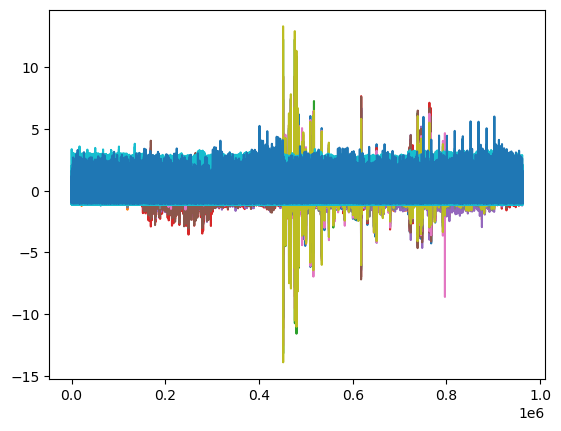

In [12]:
plt.plot(input_1)
plt.plot(output_1)
plt.show

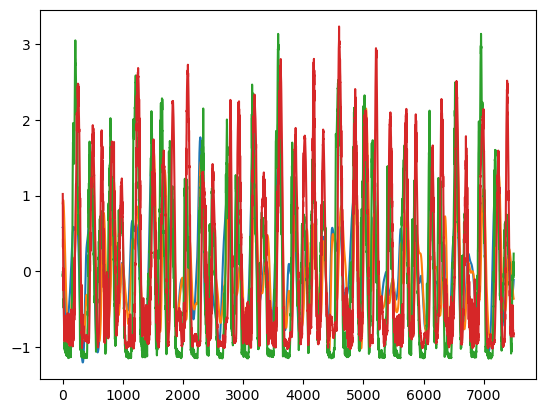

In [13]:
plt.plot(Y_pred[7500:15000])
plt.plot(Y_test[7500:15000])
plt.show()

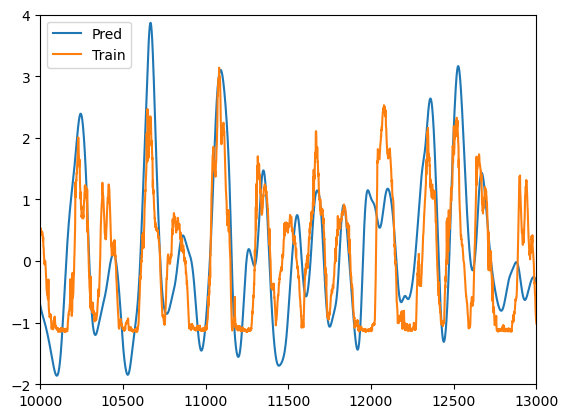

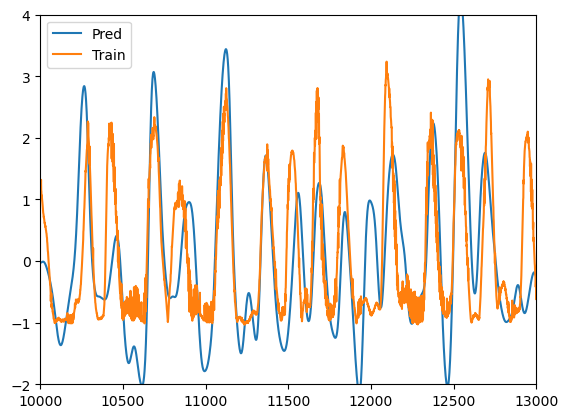

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


fig,ax = plt.subplots()
ax.plot(Y_pred[:,0]*2,label="Pred")
ax.plot(Y_test[:,0],label ="Train")
ax.set_xlim(10000,13000)
ax.set_ylim(-2,4)
ax.legend()

fig,ax = plt.subplots()
ax.plot(Y_pred[:,1]*2,label="Pred")
ax.plot(Y_test[:,1],label ="Train")
ax.set_xlim(10000,13000)
ax.set_ylim(-2,4)
ax.legend()


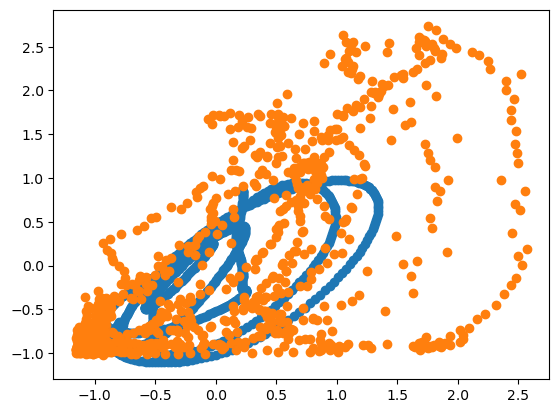

In [15]:
size=1000
tmp_pred = Y_pred[0:size]
tmp_test = Y_test[0:size]
plt.scatter(tmp_pred[:,0],tmp_pred[:,1])
plt.scatter(tmp_test[:,0],tmp_test[:,1])

In [37]:
Y_train.shape

(962471, 2)

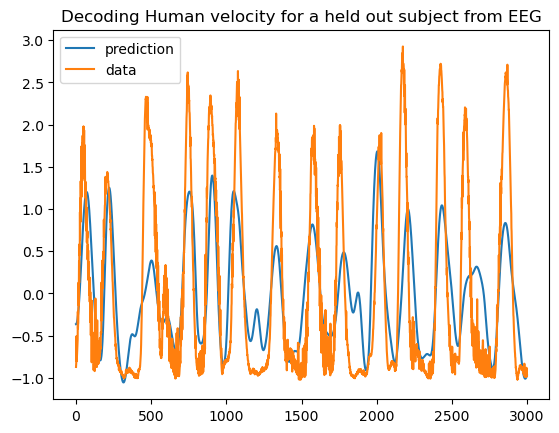

In [24]:
plt.plot(Y_pred[15000:18000,1],label='prediction')
plt.plot(Y_test[15000:18000,1],label='data')
plt.title("Decoding Human velocity for a held out subject from EEG")
plt.legend()
plt.show()


In [35]:
Y_pred.shape

(240618, 2)

In [19]:
print(rmse(Y_pred[5000:10000,0],Y_test[5000:10000,0]))

0.8381656541365002


In [30]:
stats.pearsonr(Y_pred[:,1],Y_test[:,1])

PearsonRResult(statistic=0.2508664183865119, pvalue=0.0)

In [34]:
stats.pearsonr(Y_pred[5000:10000,0],Y_test[5000:10000,0])

PearsonRResult(statistic=0.5771513272069269, pvalue=0.0)

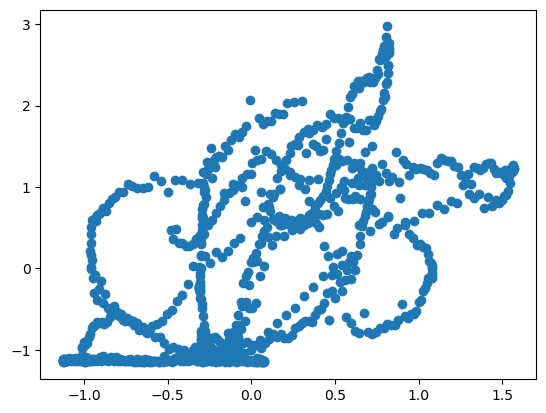

In [33]:
plt.scatter(Y_pred[5000:6000,0],Y_test[5000:6000,0])
plt.show()